<a href="https://colab.research.google.com/github/JoshuaOmondi/Data-Projects/blob/master/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:

# Load the dataset
data = pd.read_csv('WineQT.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


##EDA





In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


<Axes: >

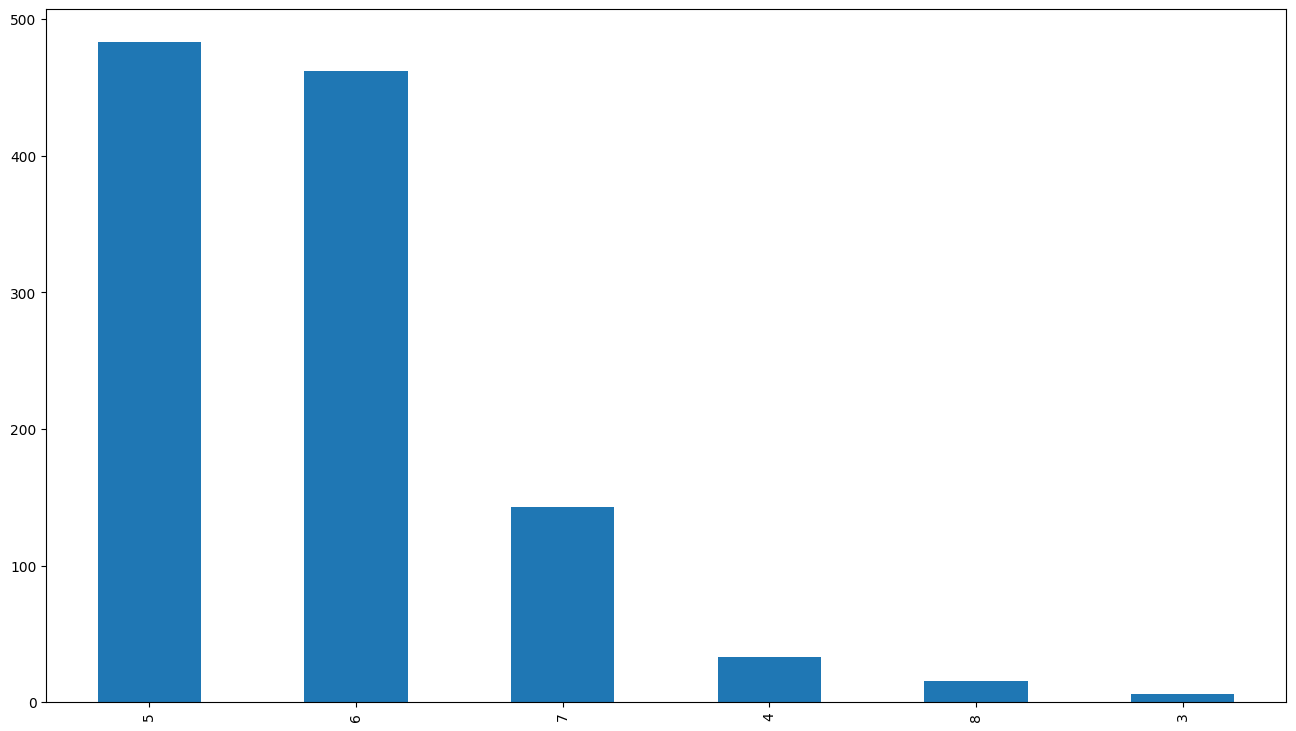

In [ ]:
plt.figure(figsize=(16,9))
data['quality'].value_counts().head(8).plot.bar()

In [ ]:
# Prepare the data
X = data[["alcohol", "residual sugar", "chlorides", "fixed acidity","volatile acidity","citric acid","sulphates","pH","free sulfur dioxide","total sulfur dioxide"]]
y = data["quality"]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# Train the random forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

In [ ]:

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.69      0.79      0.74       119
           6       0.64      0.64      0.64       115
           7       0.59      0.49      0.54        39
           8       0.50      0.25      0.33         4

    accuracy                           0.66       286
   macro avg       0.49      0.43      0.45       286
weighted avg       0.63      0.66      0.64       286



In [ ]:

# Determine feature importance
importances = rf_classifier.feature_importances_
feature_names = X.columns

In [ ]:
# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

                Feature  Importance
0               alcohol    0.162594
6             sulphates    0.130452
4      volatile acidity    0.111980
9  total sulfur dioxide    0.106850
2             chlorides    0.092623
7                    pH    0.087887
3         fixed acidity    0.080900
5           citric acid    0.080203
8   free sulfur dioxide    0.075790
1        residual sugar    0.070722


## Random Forest Classifier

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Load the dataset
data = pd.read_csv('WineQT.csv')

# Prepare the data
X = data[["alcohol", "residual sugar", "chlorides", "fixed acidity","volatile acidity","citric acid","sulphates","pH","free sulfur dioxide","total sulfur dioxide"]]
y = data["quality"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the random forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)


# Evaluate the model
print(classification_report(y_test, y_pred))

# Determine feature importance
importances = rf_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)


              precision    recall  f1-score   support

           4       0.00      0.00      0.00         7
           5       0.67      0.75      0.71       121
           6       0.63      0.64      0.64       121
           7       0.70      0.56      0.62        34
           8       0.00      0.00      0.00         3

    accuracy                           0.66       286
   macro avg       0.40      0.39      0.39       286
weighted avg       0.63      0.66      0.64       286

                Feature  Importance
0               alcohol    0.152182
6             sulphates    0.126647
4      volatile acidity    0.117971
9  total sulfur dioxide    0.108974
2             chlorides    0.096251
3         fixed acidity    0.086628
7                    pH    0.082249
5           citric acid    0.082054
8   free sulfur dioxide    0.073607
1        residual sugar    0.073436


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
